#### HDS5230 Week 6 Assignment
#### Author: Wenshan, Liu
#### Date: 03/02/2025

#Unzip MO_2018_Federally_Qualified_Health_Center_Locations.zip
#Unzip MO_pop_Sim.zip

#Install geopandas, shapely, pyproj, pyogrio

In [1]:
%%bash

#pip install shapely
#pip install pyproj
#pip install pyogrio
pip install 'geopandas[all]'

In [2]:
%%bash
head -100 MO_pop_sim.csv

#head -100 Mo_pop_Sim/MO_pop_sim.csv

#The first column denotes if the residence is Urban or Rural
#The next two columns are longitude and latitude

UR,long,lat
R,-92.5062761212864,40.2792029061618
R,-92.5051318550842,40.276889612375
R,-92.5058899870041,40.2782423375098
R,-92.5198418278749,40.3277000831164
R,-92.524877366008,40.3295107045137
R,-92.5291823662756,40.3250413897606
R,-92.5324094395201,40.3249121413652
R,-92.526117330564,40.3264884161639
R,-92.5238984086017,40.3283689573053
R,-92.5249032416176,40.3271086309602
R,-92.5316566215904,40.3242213951089
R,-92.5230777749596,40.3245033699447
R,-92.5242509080343,40.3302713952819
R,-92.5237486887981,40.3242483650306
R,-92.530986265588,40.3245361361651
R,-92.5252466463363,40.3231027736977
R,-92.5219058607571,40.326671995696
R,-92.5826490381395,40.2515549341225
R,-92.5108897641274,40.2638229644672
R,-92.489846693235,40.2614590871247
R,-92.4959112103302,40.2680114210773
R,-92.5009400891376,40.2636468925299
R,-92.5039040265058,40.2688985252472
R,-92.4918817039017,40.2597362963358
R,-92.6257326039896,40.3292801694796
R,-92.6282872182202,40.3251945459803
R,-92.6234825313172,40.320922619

In [3]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install folium matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

In [6]:
# Read the shapefile
shapefile_path = "MO_2018_Federally_Qualified_Health_Center_Locations"  # Replace with the actual path
gdf = gpd.read_file(shapefile_path)

# Now 'gdf' is a GeoDataFrame containing the data from the shapefile
# You can inspect it using:
print(gdf.head())

print(gdf.crs) # print the coordinate reference system # crs= the coordinate reference system of the shapefile
crs = gdf.crs
gdf = gdf.set_index("OBJECTID")


print(gdf.columns)
fqhc_df = gdf['geometry'] # fqhc_df is the geometry column of the shapefile
fqhc_df



   OBJECTID                      Group_Name  \
0         1                         COMTREA   
1         2  Missouri Highlands Health Care   
2         3   Central Ozarks Medical Center   
3         4  Missouri Highlands Health Care   
4         5           Swope Health Services   

                                            Facility  \
0                  COMTREA Byrnes Mill Health Center   
1                            Viburnum Medical Clinic   
2          Central Ozarks Medical Center At The Lake   
3  Missouri Highland Medical Clinic - Poplar Bluf...   
4                         Swope Health Hickman Mills   

                                Address           City     County State  \
0            100 Osage Executive Circle  House Springs  Jefferson    MO   
1               18 Viburnum Center Road       Viburnum       Iron    MO   
2                  3870 Columbia Avenue    Osage Beach     Miller    MO   
3  225 Physicians Park Drive, Suite 303   Poplar Bluff     Butler    MO   
4    

OBJECTID
1      POINT (-90.55472 38.43597)
2      POINT (-91.13403 37.71462)
3      POINT (-92.60144 38.16025)
4      POINT (-90.45724 36.77261)
5       POINT (-94.49886 38.9629)
                  ...            
193    POINT (-91.77391 37.94594)
194     POINT (-93.29166 37.2243)
195    POINT (-91.56258 36.56534)
196    POINT (-90.23025 38.67777)
197    POINT (-92.20212 38.56633)
Name: geometry, Length: 197, dtype: geometry

In [7]:
# In Missouri it is roughly 56 miles per degree of longitude and 69 miles per degree of latitude. We'll use an approximation of 63 miles per unit for our circle.
DEGREES_PER_MILE = 1/ 63
circles_geom = gdf.buffer( 30 * DEGREES_PER_MILE) # apporach2 to create the circle of 30 miles
fqhc_circles_df = gpd.GeoDataFrame(gdf, geometry=circles_geom, crs=crs) # create a new dataframe with the circle of 30 miles
fqhc_circles_df 

/var/folders/ym/cnwhpvr13b10x0g3j5y5kn9w0000gn/T/ipykernel_12419/3087129275.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  circles_geom = gdf.buffer( 30 * DEGREES_PER_MILE) # apporach2 to create the circle of 30 miles


,Group_Name,Facility,Address,City,County,State,Zip,Phone,Latitude,Longitude,Loc_Code,geometry
OBJECTID,,,,,,,,,,,,
1,COMTREA,COMTREA Byrnes Mill Health Center,100 Osage Executive Circle,House Springs,Jefferson,MO,63051,6367893372,38.435946,-90.554678,MAP,"POLYGON ((-90.07853 38.43597, -90.08082 38.389..."
2,Missouri Highlands Health Care,Viburnum Medical Clinic,18 Viburnum Center Road,Viburnum,Iron,MO,65566,5732445406,37.714620,-91.133983,MAP,"POLYGON ((-90.65784 37.71462, -90.66013 37.667..."
3,Central Ozarks Medical Center,Central Ozarks Medical Center At The Lake,3870 Columbia Avenue,Osage Beach,Miller,MO,65065,5733027490,38.160258,-92.601463,MAP,"POLYGON ((-92.12525 38.16025, -92.12754 38.113..."
4,Missouri Highlands Health Care,Missouri Highland Medical Clinic - Poplar Bluf...,"225 Physicians Park Drive, Suite 303",Poplar Bluff,Butler,MO,63901,5737856536,36.772568,-90.457206,MAP,"POLYGON ((-89.98105 36.77261, -89.98334 36.725..."
5,Swope Health Services,Swope Health Hickman Mills,8800 Blue Ridge Boulevard,Kansas City,Jackson,MO,64138,8163213200,38.962882,-94.498847,MAP,"POLYGON ((-94.02267 38.9629, -94.02496 38.9162..."
...,...,...,...,...,...,...,...,...,...,...,...,...
193,Your Community Health Center,Your Community Health Center - Health Department,"200 North Main, Suite G51",Rolla,Phelps,MO,65401,5734586950,37.945925,-91.773948,MAP,"POLYGON ((-91.29772 37.94594, -91.30001 37.899..."
194,Jordan Valley Community Health Center,Jordan Valley Community Health Center - Medica...,"1443 N. Roberson, Suite 505",Springfield,Greene,MO,65802,4178511554,37.224321,-93.291591,MAP,"POLYGON ((-92.81547 37.2243, -92.81776 37.1776..."
195,Southern Missouri Community Health Center,Oregon County Community Health Center,"US Highway 63 North (RR 3, Box 3703)",Thayer,Oregon,MO,65791,4172642990,36.565336,-91.562618,MAP,"POLYGON ((-91.08639 36.56534, -91.08869 36.518..."


In [8]:
def create_point_column(df, lon_col, lat_col, crs="EPSG:4326"):
    """
    Creates a geometry column of Point objects from longitude and latitude columns in a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing longitude and latitude columns.
        lon_col (str): The name of the longitude column.
        lat_col (str): The name of the latitude column.
        crs (str, optional): Coordinate Reference System. Defaults to "EPSG:4326".

    Returns:
        geopandas.GeoDataFrame: A GeoDataFrame with the added geometry column.


    """

    geometry = [Point(xy) for xy in zip(df[lon_col], df[lat_col])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry, crs=crs)
    return gdf

In [9]:
# Read the shapefile
#pop_file_path = "Mo_pop_sim/Mo_pop_Sim.csv"  # Replace with the actual path
pop_file_path = "Mo_pop_Sim.csv"  # Replace with the actual path
big_pop_df = pd.read_csv(pop_file_path)
pop_df = big_pop_df.sample(frac=0.01) # only use 1% of the sample 

pop_gdf = create_point_column(pop_df, 'long', 'lat', crs)
pop_gdf

print(pop_gdf.columns)

Index(['UR', 'long', 'lat', 'geometry'], dtype='object')


In [10]:
len(pop_gdf)



63325

In [ ]:
# to find the number of people in each circle and the number of FQHCs in each circle
pop_in_circles = gpd.sjoin(pop_gdf, fqhc_circles_df, predicate='within').groupby('OBJECTID').count()
# sjoin: spatial join, #to find the number of people in each circle and the number of FQHCs in each circle

pop_in_circles

,UR,long,lat,geometry,Group_Name,Facility,Address,City,County,State,Zip,Phone,Latitude,Longitude,Loc_Code
OBJECTID,,,,,,,,,,,,,,,
1,19639,19639,19639,19639,19639,19639,19639,19639,19639,19639,19639,19639,19639,19639,19639
2,597,597,597,597,597,597,597,597,597,597,597,597,597,597,597
3,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282
4,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942
5,11010,11010,11010,11010,11010,11010,11010,11010,11010,11010,11010,11010,11010,11010,11010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513
194,4577,4577,4577,4577,4577,4577,4577,4577,4577,4577,4577,4577,4577,4577,4577
195,463,463,463,463,463,463,463,463,463,463,463,463,463,463,463


In [12]:
closest_fqhc = gpd.sjoin_nearest(pop_gdf, gdf) # sjoin_nearest to find the nearest FQHC to each population point
closest_fqhc

/Users/sandyliu/anaconda3/envs/Class_HDS5330/lib/python3.10/site-packages/geopandas/array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


,UR,long,lat,geometry,OBJECTID,Group_Name,Facility,Address,City,County,State,Zip,Phone,Latitude,Longitude,Loc_Code
293441,U,-92.355937,38.909212,POINT (-92.35594 38.90921),192,Family Health Center,Family Health Center (Administrative Office),401 West Boulevard North,Columbia,Boone,MO,65203,5732143314,38.958739,-92.353211,MAP
6038940,U,-90.279126,38.568916,POINT (-90.27913 38.56892),64,Family Care Health Centers,Carondelet Health & Dental Center,401 Holly Hills Avenue,St. Louis,St. Louis City,MO,63111,3143535190,38.558299,-90.250930,MAP
6038940,U,-90.279126,38.568916,POINT (-90.27913 38.56892),65,Family Care Health Centers,Family Care Health Centers (Administrative Off...,401 Holly Hills Avenue,St. Louis,St. Louis City,MO,63111,3144811615,38.558299,-90.250930,MAP
866602,R,-93.539989,37.023052,POINT (-93.53999 37.02305),82,Jordan Valley Community Health Center,Jordan Valley Community Health Center Republic...,550 E. Harrison Street,Republic,Greene,MO,65738,4178511565,37.120073,-93.471493,MAP
1414117,R,-90.078362,36.176559,POINT (-90.07836 36.17656),138,Southeast Missouri Health Network,Otto Bean Medical,500 Russell,Kennett,Dunklin,MO,63857,5737171332,36.245074,-90.046810,MAP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762640,U,-94.526924,38.810784,POINT (-94.52692 38.81078),144,Swope Health Services,Swope Health Belton,204 E. North Avenue,Belton,Cass,MO,64012,8165995170,38.815002,-94.531904,MAP
2882076,R,-90.435966,38.123606,POINT (-90.43597 38.12361),53,COMTREA Comprehensive Health Center,COMTREA Comprehensive Health Center Administra...,227 East Main Street,Festus,Jefferson,MO,63028,6366779977,38.219992,-90.392666,MAP
4524703,U,-90.523725,37.885266,POINT (-90.52373 37.88527),73,Great Mines Health Center,Great Mines Health Center of Farmington (Dental),508 West Pine,"Farmington,",St. Francois,MO,63640,5736641100,37.789991,-90.426682,MAP
3408588,R,-92.202404,38.288740,POINT (-92.2024 38.28874),44,Community Health Center of Central Missouri,Community Health Center of Central Missouri - ...,1511 Christy Drive,Jefferson City,Cole,MO,65109,5736322777,38.559741,-92.189269,MAP


In [13]:
count = closest_fqhc.groupby('OBJECTID').count()
count

,UR,long,lat,geometry,Group_Name,Facility,Address,City,County,State,Zip,Phone,Latitude,Longitude,Loc_Code
OBJECTID,,,,,,,,,,,,,,,
1,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286
2,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180
3,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359
4,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157
5,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506
194,763,763,763,763,763,763,763,763,763,763,763,763,763,763,763
195,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119


In [14]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt  
import seaborn as sns 

# to use approach 2 to analyze the coverage of FQHCs
# approach 2: consider locations that have the highest densities of residences within a 30-mile radius 
def analyze_fqhc_coverage(fqhc_circles_df, pop_gdf):
    """
    analyze the coverage of FQHCs
    
    Parameters:
    fqhc_circles_df: GeoDataFrame containing FQHC 30-mile service areas
    pop_gdf: GeoDataFrame containing population points
    
    Returns:
    pandas.Series: the number of population covered by each FQHC
    """
    # use spatial join to find which FQHC each population point belongs to
    pop_in_circles = gpd.sjoin(pop_gdf, fqhc_circles_df, predicate='within')
    
    # calculate the number of population covered by each FQHC
    coverage_counts = pop_in_circles.groupby('OBJECTID').size()
    
    # convert the result to the actual number of population covered (considering the sampling ratio)
    coverage_counts = coverage_counts * 100  # because we only used 1% of the sample
    
    return coverage_counts 

def select_top_locations(coverage_counts, n=8): # select the top n locations with the highest coverage
    """
    select the top n locations with the highest coverage
    
    Parameters:
    coverage_counts: the number of population covered by each FQHC
    n: the number of locations to select
    
    Returns:
    list: the IDs of the selected FQHCs
    """
    return coverage_counts.nlargest(n).index.tolist()




In [18]:

def visualize_results(fqhc_df, pop_gdf, selected_locations):
    """
    create a visualization of the results
    
    Parameters:
    fqhc_df: FQHC data
    pop_gdf: population data
    selected_locations: the IDs of the selected FQHCs
    """
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # plot population points
    pop_gdf.plot(ax=ax, color='green', alpha=0.1, markersize=1)
    
    # plot all FQHC locations 
    fqhc_df.plot(ax=ax, color='blue', markersize=20, alpha=0.5)
    
    # highlight the selected locations
    fqhc_df.loc[selected_locations].plot(
        ax=ax, 
        color='red', 
        markersize=100, 
        alpha=0.5
    )
    
    # add title and legend
    ax.set_title('FQHC location analysis results in MO')
    ax.legend(['population points', 'FQHC locations', 'selected FQHC'])
    
    return fig


In [19]:
def main():
    # calculate the coverage of population
    coverage_counts = analyze_fqhc_coverage(fqhc_circles_df, pop_gdf)
    
    # select the best locations
    selected_locations = select_top_locations(coverage_counts)
    
    # create a visualization
    fig = visualize_results(fqhc_df, pop_gdf, selected_locations)
    
    # create a results DataFrame
    results_df = pd.DataFrame({
        'FQHC_ID': coverage_counts.index,  # all FQHC IDs
        'Population_Coverage': coverage_counts.values  # the corresponding coverage of population
    })
    
    # sort the results by population coverage in descending order
    results_df = results_df.sort_values('Population_Coverage', ascending=False)
    
    # save the complete results to a csv file
    results_df.to_csv('fqhc_coverage_analysis.csv', index=False) 
    
    # print the analysis results
    print("Top 8 FQHC locations by population coverage:")
    print(results_df.head(8))

    
    return selected_locations, coverage_counts, fig

Top 8 FQHC locations by population coverage:
     FQHC_ID  Population_Coverage
156      157              1964900
157      158              1964700
0          1              1963900
54        55              1933500
48        49              1927000
155      156              1889200
35        36              1852300
32        33              1812100


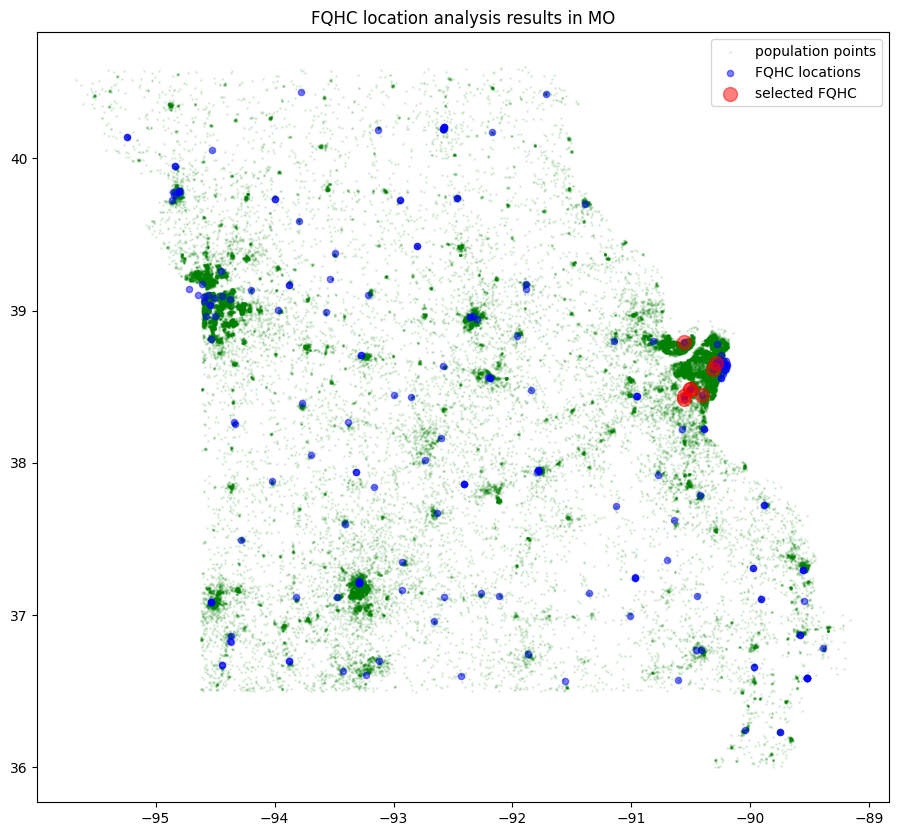

In [20]:
if __name__ == "__main__":
    selected_locations, coverage_counts, fig = main()
   
    plt.show()  # show the visualization of the results


 ##### To use approach 2 to analyze the coverage of FQHCs </br>

This FQHC site study uses a fitness function that calculates the overall population coverage within a 30-mile radius of each FQHC location. We use spatial join operations between population points and FQHC service regions to determine the absolute number of individuals that each possible FQHC site would serve. The final figures are multiplied by 100 to approximate the overall population coverage since we're utilizing a 1% population sample at the beginning. </br>

Since our main goal is to provide healthcare services to as many people as possible with the resources at our disposal, this fitness parameter should be maximized. More people having access to healthcare services is indicated by a higher value, which makes it a better option for location. For instance, Location 2 would be seen more appropriate and hence favored if it serves 75,000 people whereas Location 1 serves 50,000. </br>

There are three reasons behind this strategy. First of all, it clearly illustrates service accessibility, a primary objective of FQHCs. Second, it offers a measurable, simply comprehensible statistic that may be used for cross-location comparison. Third, it supports the core objective of FQHCs, which is to serve as many people as possible with healthcare services.</br>
